In [167]:
 #Assignment - 9

# PCA : Principal Components Analysis

In [168]:
import pandas as pd

df = pd.read_csv('wine.csv')

df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [170]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [171]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


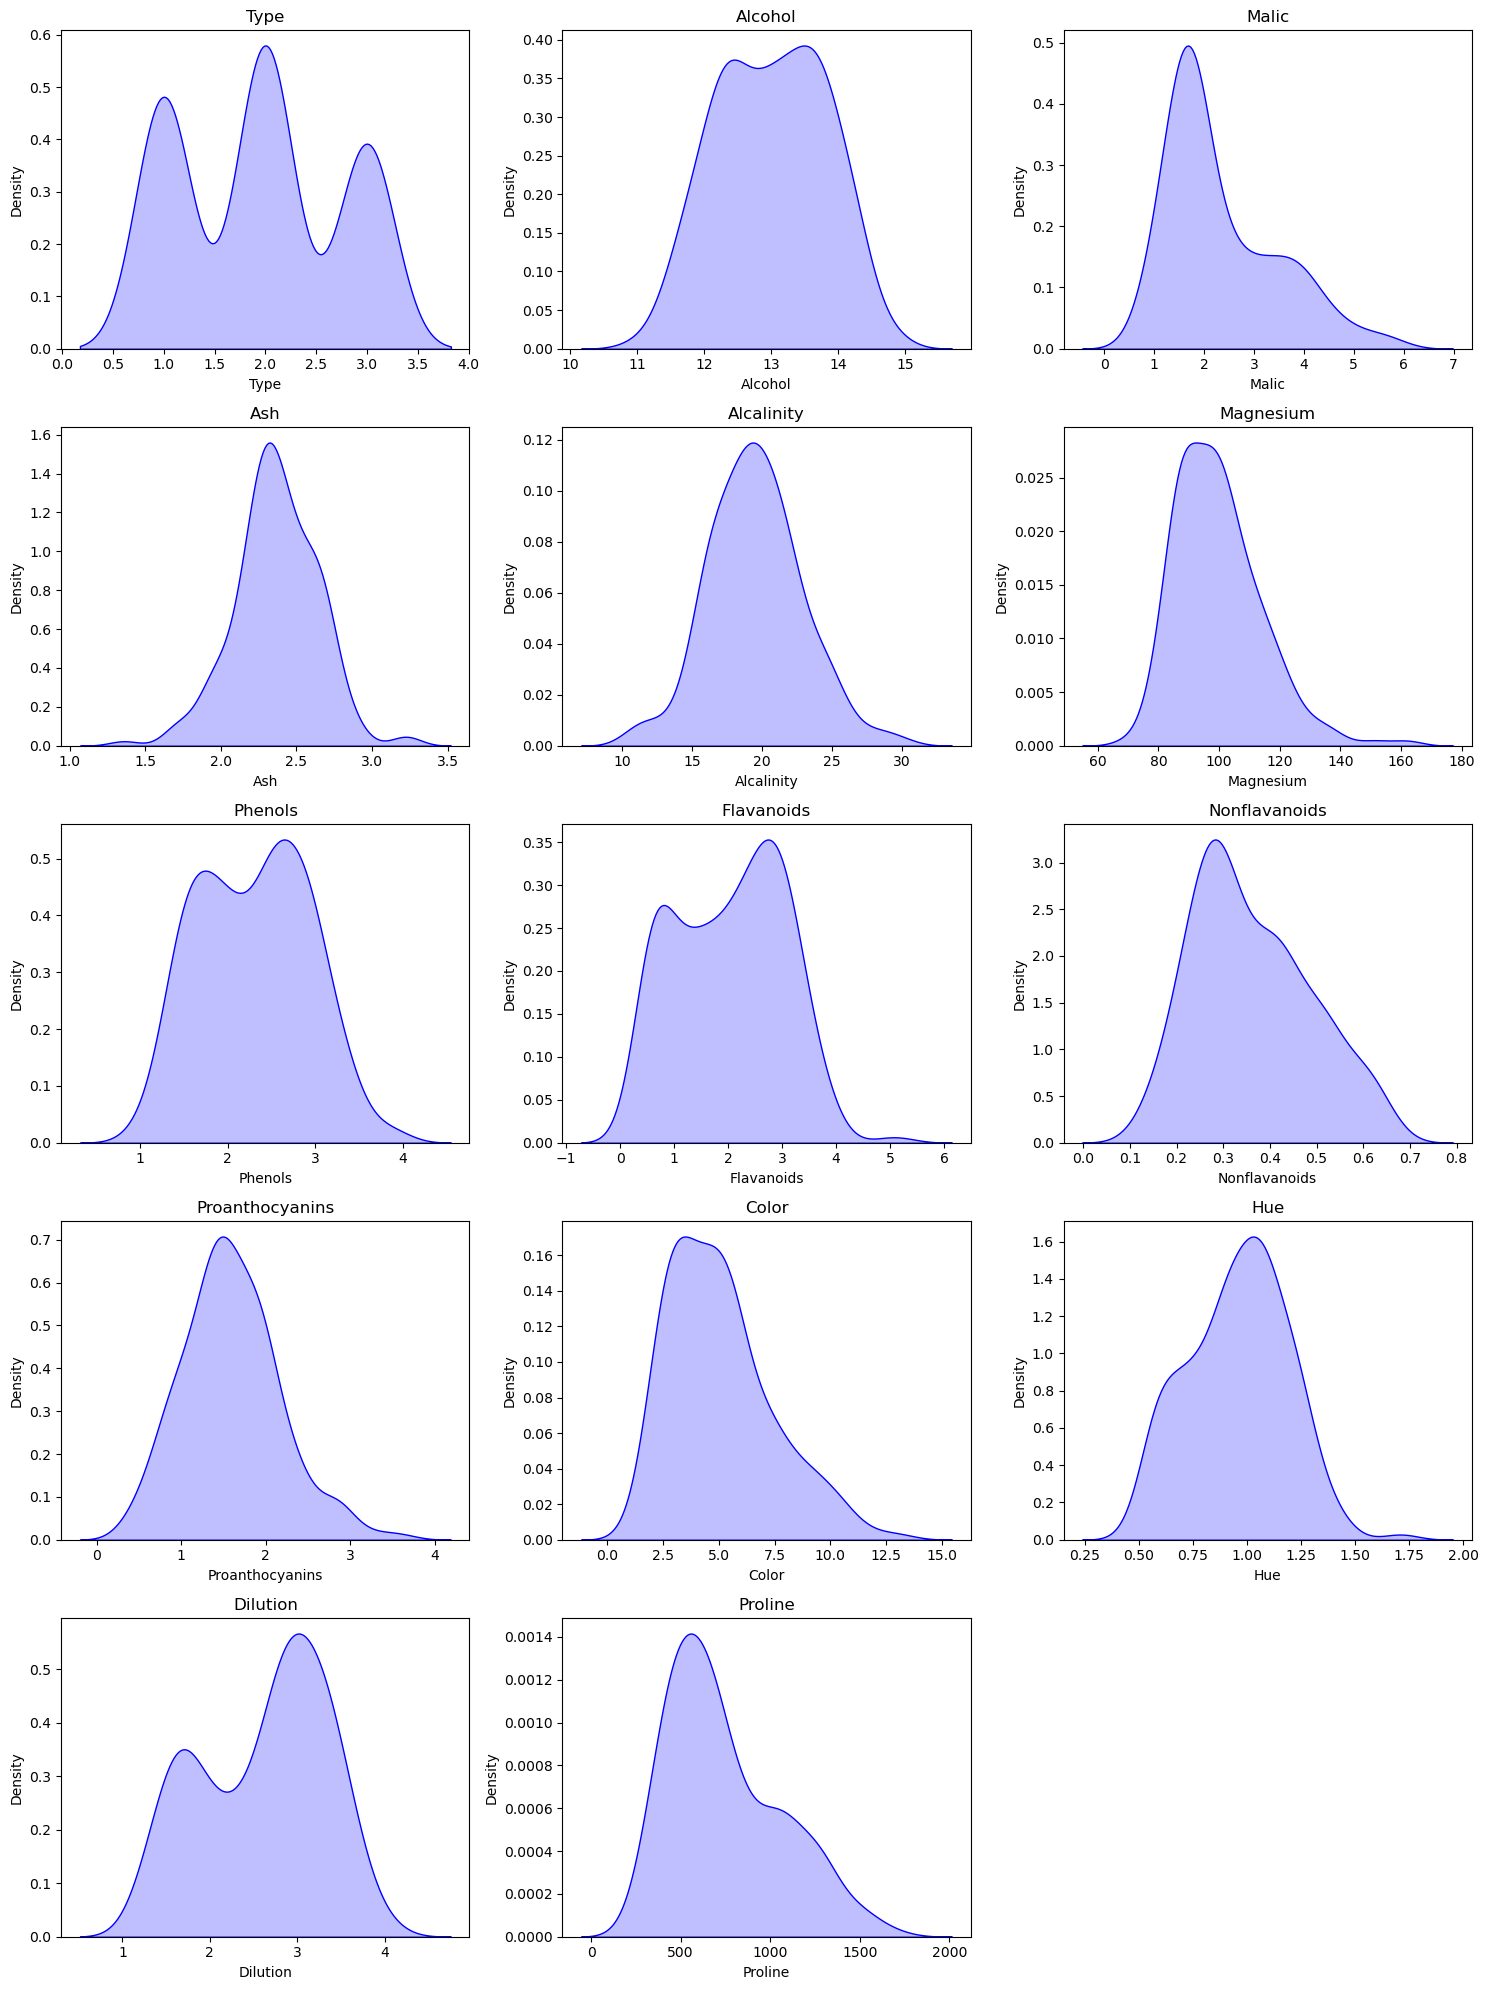

In [172]:
# density plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,20))

for i,col in enumerate(df.columns,1):
    plt.subplot(5,3,i)
    sns.kdeplot(df[col], fill=True, color="blue")
    plt.title(col)

plt.tight_layout()
plt.show()

<Axes: >

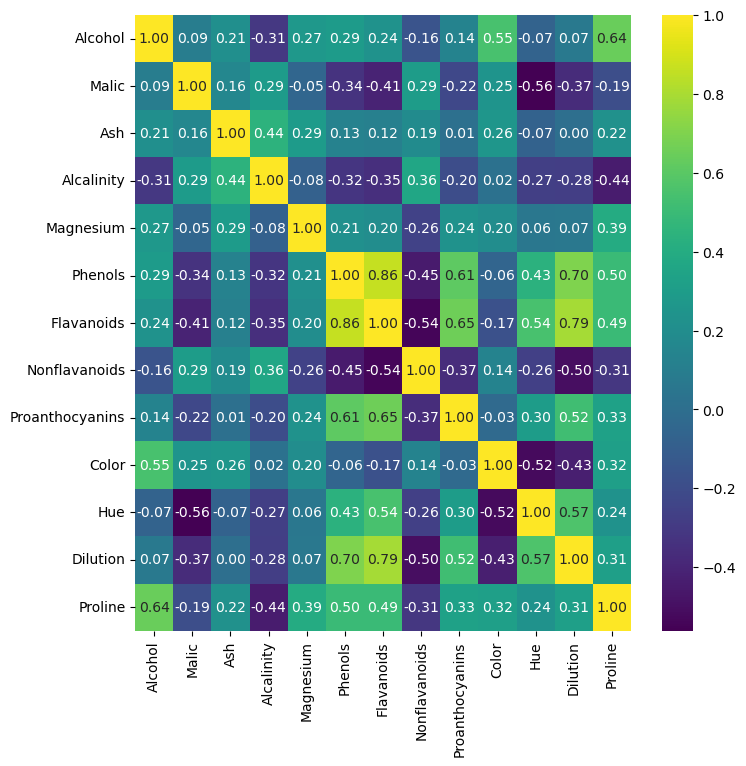

In [173]:
# checking correlationship
X = df.drop('Type',axis=1)
y = df['Type']

corr_matrix = X.corr()

plt.figure(figsize=(8,8))
            
sns.heatmap(corr_matrix,cmap = 'viridis',annot=True,fmt='.2f')

In [174]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

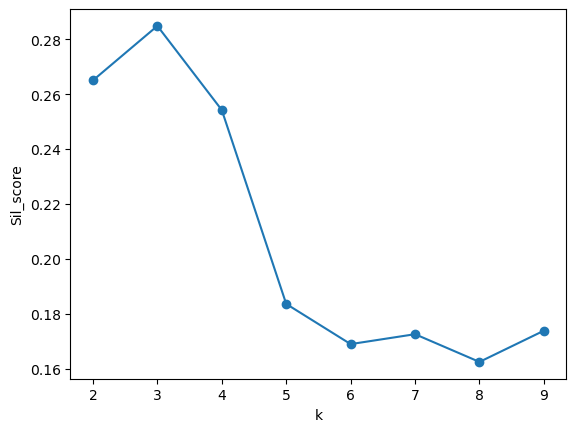

In [175]:
# K-means

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.plot(K, sil_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Sil_score")
plt.show()

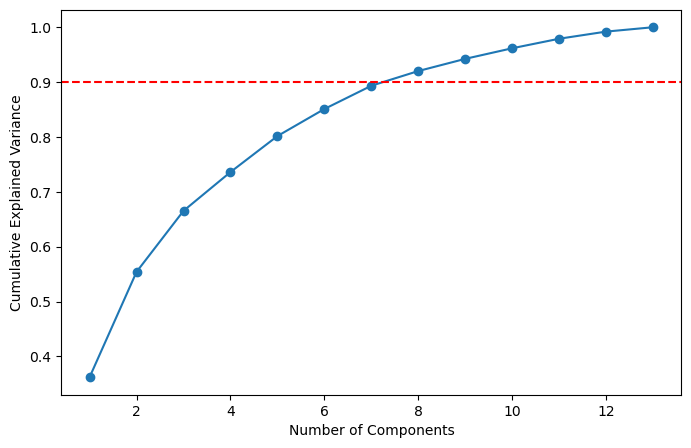

In [176]:
# PCA
# selecting number of PCA

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

cumulative_var = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color ='red',linestyle = '--')  # 90% threshold
plt.show()

In [177]:
kmeans = KMeans(n_clusters=3,random_state=42)

labels = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled,labels)
print(f'{score:.3f}')

0.285


In [178]:
# transforming into PCs

pca = PCA(n_components=7)

X_pca = pca.fit_transform(X_scaled)

print(f'PCs = {pca.components_}')             # number of rows = PCs , cols = contribution of each PC

print(f'variance ratio cumulative sum = {pca.explained_variance_ratio_.cumsum()}')   # cumsum of 7 PCs

PCs = [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
   0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
  -0.1578688 ]
 [ 0.21353865  0.53681385  0.15447466 -0.10082451  0.03814394 -0.0841223
  -0.01892002 -0.25859401 -0.53379539 -0.41864414  0.10598274  0.26585107
   0.11972557]
 [-0.05639636  0.

In [179]:
# Comparision PCs vs all original features

pca_model = KMeans(n_clusters=3,random_state=42)

pca_labels = pca_model.fit_predict(X_pca)

centers_pca = pca_model.cluster_centers_
centers_og = pca.transform(kmeans.cluster_centers_)

score = silhouette_score(X_pca,pca_labels)
print(f'{score:.3f}')

0.328


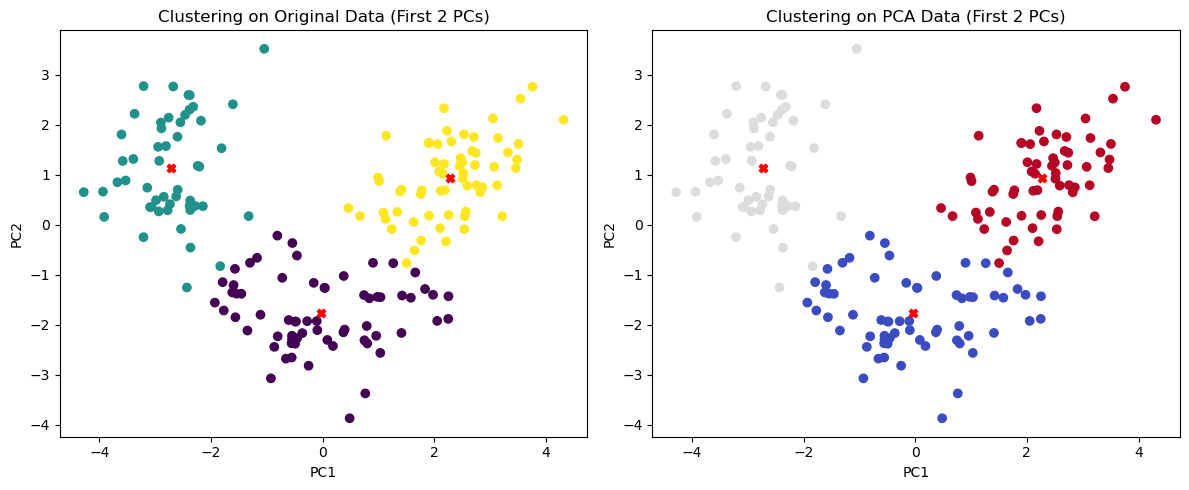

In [182]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centers_og[:, 0], centers_og[:, 1], c='red', marker='X')
plt.title('Clustering on Original Data (First 2 PCs)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# PCA Data Plot
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pca_labels, cmap='coolwarm')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X')
plt.title('Clustering on PCA Data (First 2 PCs)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

#### Conclusion 

PCA as a Pre-processing Step: In this case, using PCA to reduce the dimensionality from 13 features to 7 did not drastically improve the clustering performance, though it did lead to a small increase in the silhouette score. This suggests that the original features were not excessively correlated, or that the relationships captured by the first few principal components were not strong enough to create a significantly better clustering structure.

#### Trade-offs

Trade-off is between computational efficiency and interpretability. By using PCA, you can reduce the number of features, which makes the clustering process faster. However, interpreting the results becomes more complex as the clusters are defined by a combination of principal components rather than the original.

#### summary

PCA can be a powerful tool for improving clustering by removing noise and multicollinearity, it did not have a dramatic effect on this dataset.